In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check for any missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

(7.5, -0.5)

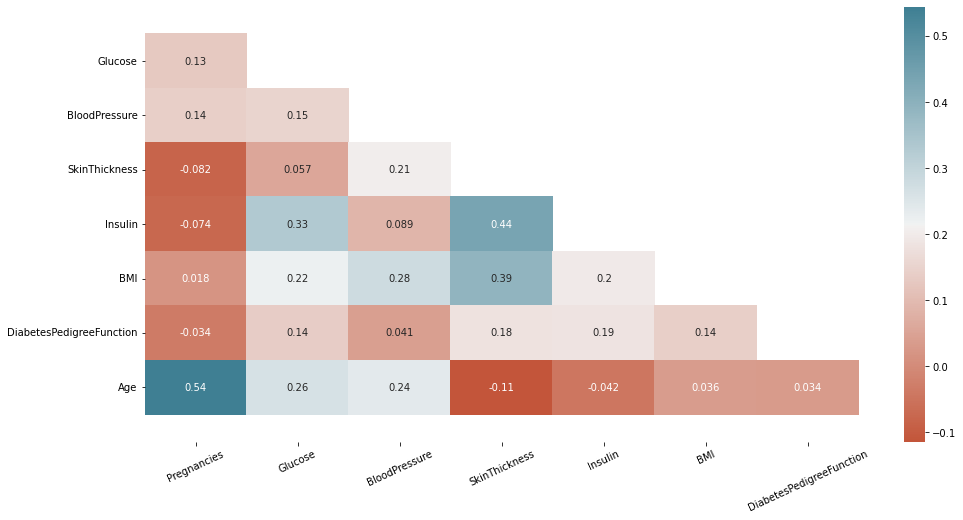

In [11]:
# Correlation between variables
## Correlation plot
fig, ax = plt.subplots(figsize=(16,8))
mask = np.triu(df.drop('Outcome', axis = 1).corr())
mask = mask[1:, :-1]
corr = df.drop('Outcome', axis=1).corr().iloc[1:,:-1].copy()
sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap=sns.diverging_palette(20,220, n=256))
plt.xticks(rotation=25)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [15]:
y = df["Outcome"]
X = df.loc[:, df.columns != "Outcome"]

# Standardize the data as some of variables such as Wage and Value are huge compared to the skills features
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size = 0.3, stratify = y, random_state = 10)

In [19]:
# Base Logistic Regression 
log_reg = LogisticRegression(random_state = 1)
log_model = log_reg.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

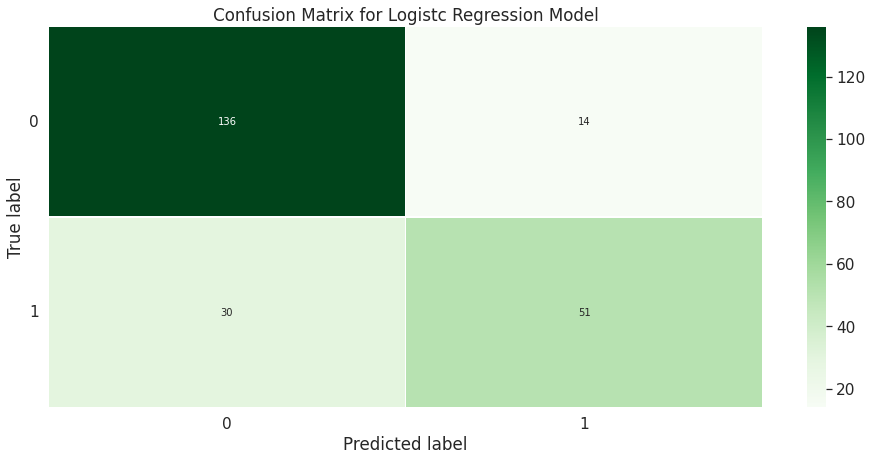

In [40]:
# Evaluation
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, log_preds)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='g')

# Add labels to the plot
class_names = ['0','1']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistc Regression Model')
plt.show()

In [41]:
## Test set scores for base logistic regression model ##
# F1 score 
print(f"F1 score: {f1_score(y_test, log_preds, average = 'weighted')}")

# Accuracy Score 
print(f"Accuracy score: {accuracy_score(y_test, log_preds)}") 

F1 score: 0.8039089400282394
Accuracy score: 0.8095238095238095


In [51]:
# Logistic Regression with tuning to improve score

log_reg = LogisticRegression(random_state = 11)

param_grid = {
     'penalty' : ['l1', 'l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['liblinear']
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=111)

cv_grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=cv)
cv_grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=111),
             estimator=LogisticRegression(random_state=11),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [52]:
# Get the best parameters
cv_grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [53]:
log_model = LogisticRegression(random_state=11, penalty='l1', solver='liblinear', C=100)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

log_preds_train = log_model.predict(X_train)


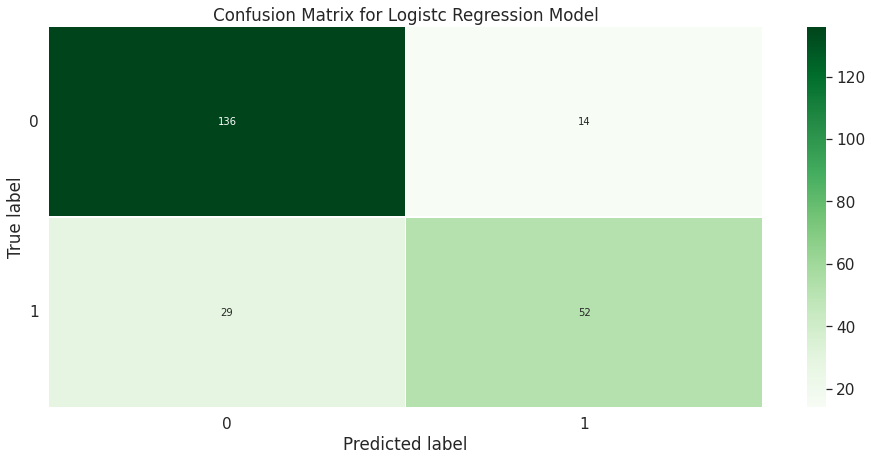

In [54]:
# Evaluation
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, log_preds)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='g')

# Add labels to the plot
class_names = ['0','1']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistc Regression Model')
plt.show()

In [55]:
## Test set scores for tuned model ##
# F1 score 
print(f"F1 score: {f1_score(y_test, log_preds, average = 'weighted')}")

# Accuracy Score 
print(f"Accuracy score: {accuracy_score(y_test, log_preds)}") 

F1 score: 0.8087875842977883
Accuracy score: 0.8138528138528138
